In [1]:
!pip install --quiet -e ../../

%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from rich import print, inspect
from soccertrack.utils import load_config, write_config
from soccertrack.utils.camera import load_cameras, find_intrinsic_camera_parameters
from soccertrack.detect import detect_objects
from soccertrack.utils import cv2pil

cfg = load_config('./detect_and_track.yaml')

In [3]:
cameras = load_cameras(cfg.cameras)

kxs,kys =[],[]
for camera in cameras:
    for x, y in camera.source_keypoints:
        x, y = camera.video2pitch(np.array([x, y])).squeeze()
        kxs.append(x)
        kys.append(y)

pitch = Pitch(pitch_color='black', line_color=(.3,.3,.3), pitch_type='custom', pitch_length=105, pitch_width=68) 
fig, ax = pitch.draw()
plt.scatter(xs, ys, color='deeppink')
plt.scatter(kxs, kys, color='red')
plt.show()

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

NameError: name 'np' is not defined

In [ ]:
# detection
"""
TODO: detection checklist
    - return results as list of Detection Objects -> OK
    - option to visualize detections? 
    - aggregate detections from multiple cameras? 
    - drop detections that are out of bounds -> OK
    - Are detection results visualized and saved?
"""
player_detections, ball_detections = detect_objects(
    cameras,
    model_name='yolov5s',
    size=3000,
    batch_size=8,
    filter_range=False
)

print("N ball detections:", sum(len(x) for x in ball_detections.values()))
print("N player detections:", sum(len(x) for x in player_detections.values()))

Using cache found in /home/atom/.cache/torch/hub/ultralytics_yolov5_master


0it [00:00, ?it/s]

0it [00:00, ?it/s]

N ball detections: 676

N player detections: 9882

In [ ]:
from IPython.display import Video, display

def merge_dict_of_lists(d1, d2):
    ret = {k:v for k,v in d1.items()}
    for k, v in d1.items():
        if k in d2.keys():
            ret[k] += d2[k]
        else:
            ret[k] = d2[k]
    return ret

all_candidate_detection = merge_dict_of_lists(ball_detections, player_detections)

for i, camera in enumerate(cameras):
    save_path = os.path.join(cfg.outdir, f'camera[{i}]-visualize_candidate_detections.mp4')
    camera.visualize_candidate_detections(
        candidate_detections=all_candidate_detection, 
        filter_range=False,
        save_path=save_path
        )
    display(Video(save_path, width=600))


0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

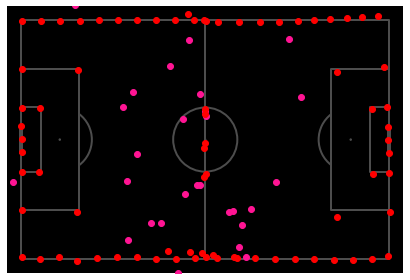

In [ ]:
%matplotlib inline
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np

xs,ys =[],[]
for pd in player_detections[0]:
    if pd.camera.label == cameras[0].label:
        px, py = cameras[0].video2pitch(np.array([pd._x, pd._y])).squeeze()
    elif pd.camera.label == cameras[1].label:
        px, py = cameras[1].video2pitch(np.array([pd._x, pd._y])).squeeze()
    else:
        raise ValueError("camera label not found")
    xs.append(px)
    ys.append(py)


pitch = Pitch(pitch_color='black', line_color=(.3,.3,.3), pitch_type='custom', pitch_length=105, pitch_width=68) 
fig, ax = pitch.draw()
plt.scatter(xs, ys, color='deeppink')
plt.scatter(kxs, kys, color='red')
plt.show()

In [ ]:
for pd in player_detections[100]:
    print(pd.camera.label)
    

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

left

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right

right